# Эссе

Суперкомпьютеры применяются:
- при расчетах на прочность методом конечных элементов;
- в вычислительной гидродинамике;
- в расчетах пластических деформаций в процессе формовки и штамповки;
- при расчете собственных частот и форм колебаний конструкций.

Мне знакомы применения HPC при расчете процессов в нефтехимическом оборудовании, расчетах на прочность этого оборудования, а также моделировании процессов изготовления оборудования. По образованию я инженер-конструктор, но по специальности не работаю.

Приведу более конкретный пример. С помощью сопромата нельзя точно посчитать напряжения, возникающие в колонном аппарате. Геометрическая форма слишком сложная. Из-за этого в расчетах вводят большое количество поправочных коэффициентов, взятых с запасом, и в итоге детали получаются массивными и металлоемкими. Расчеты на прочность методом конечных элементов позволяют посчитать механические напряжения более точно, что позволяет уменьшить толщину деталей, снизить металлоемкость и уменьшить цену оборудования.
\
Интересно, что тот компьютер, который у меня сейчас дома, лет 8 назад вполне бы сошел за суперкомпьютер в университете для CFD и механических расчетов. 16-ядерный процессор на 546 гигафлопс, 128 Гб оперативной памяти. Две 1080Ti.

Лично мне в карьере скорее всего пригодятся навыки работы с суперкомпьютером для обучение нейронных сетей.

Современные NLP модели не помещаются на обычные видеокарты. На обычном ПК с GTX 1080Ti можно максимум зафайнтюнить BERT-Base и с большим трудом BERT-Large (340 миллионов параметров на картинке ниже). Обучить их с нуля за разумный период времени на обычном ПК уже не получится. GPT-2, MegatronLM, T-NLG, а уж тем более GPT-3 (175 миллиардов параметров) даже близко запустить не получится.

In [1]:
from IPython.display import Image
from IPython.core.display import HTML 
Image(url= "https://www.microsoft.com/en-us/research/uploads/prod/2020/02/TurningNGL_Model__1400x788.png")

Аналогичная ситуация с картиночными моделями. Можно зафайнтюнить EfficientNet-B4 c 17 миллионами параметров (по сравнению с NLP моделями параметрами число параметров сильно меньше, т.к. при подсчете градиентов требуется больше памяти). А EfficientNet-B5 уже не помещается в 1080Ti.

Надо устроиться на работу куда-нибудь, где кластер есть :)

Кстати, часто видел в требованиях к вакансиям:
- знание устройства GPU и CPU
- знание особенностей оптимизации параллельного кода;
- опыт работы с CUDA.

Поэтому, думаю, что курс будет для меня полезен. 

In [2]:
Image(url= 'https://1.bp.blogspot.com/-oNSfIOzO8ko/XO3BtHnUx0I/AAAAAAAAEKk/rJ2tHovGkzsyZnCbwVad-Q3ZBnwQmCFsgCEwYBhgL/s1600/image3.png')

In [3]:
import re

import numpy as np
import requests

from bs4 import BeautifulSoup
from sklearn.linear_model import LinearRegression

In [4]:
url = 'https://top500.org/statistics/perfdevel/'
response = requests.get(url)
soup = BeautifulSoup(response.text, "html.parser")

In [5]:
text = soup.findAll('script', attrs={'type': 'text/javascript'})[9].contents[0]

In [6]:
dates = [result[1] for result in re.findall('("(\d{2}\/\d{4}): #1)', text)]

In [7]:
months = [int(date.split('/')[0]) + 12 * (int(date.split('/')[1]) - 1993) - 6 for date in dates]

In [8]:
X = np.array(months).reshape(-1, 1)

In [9]:
d = {
    'GFlop/s': 1e9,
    'TFlop/s': 1e12,
    'PFlop/s': 1e15,
    'EFlop/s': 1e18
}

n1_flops = np.array([
    float(result[2]) * d[result[3]]
    for result in re.findall('("(\d{2}\/\d{4}): #1 = (\d+\.\d+) (\w+\/s))', text)
])

n500_flops = np.array([
    float(result[2]) * d[result[3]]
    for result in re.findall('("(\d{2}\/\d{4}): #500 = (\d+\.\d+) (\w+\/s))', text)
] )

In [10]:
y_log_n1 = np.log(n1_flops)
y_log_n500 =  np.log(n500_flops)

In [11]:
lin_reg_n1 = LinearRegression().fit(X, y_log_n1)
lin_reg_n500 = LinearRegression().fit(X, y_log_n500)

In [12]:
years_to_pred = 5

X_test = X[-1:] + np.arange(12 * years_to_pred).reshape(-1, 1)

In [13]:
y_pred_n1 = np.exp(lin_reg_n1.predict(X_test))
y_pred_n500 = np.exp(lin_reg_n500.predict(X_test))

In [14]:
years = (np.r_[X, X_test] + 6) / 12 + 1993

y_EFlops_n1 = np.r_[n1_flops, y_pred_n1] / d['EFlop/s']
y_EFlops_n500 = np.r_[n500_flops, y_pred_n500] / d['EFlop/s']
y_GFlops_n1 = np.r_[n1_flops, y_pred_n1] / d['GFlop/s']
y_GFlops_n500 = np.r_[n500_flops, y_pred_n500] / d['GFlop/s']
y_PFlops_n500 = np.r_[n500_flops, y_pred_n500] / d['PFlop/s']

In [15]:
import matplotlib.pyplot as plt

MEDIUM_SIZE = 16

SMALL_SIZE = 14

plt.style.use('bmh')
plt.rcParams.update({'font.size': MEDIUM_SIZE})
plt.rcParams.update({'xtick.labelsize': SMALL_SIZE})
plt.rcParams.update({'ytick.labelsize': SMALL_SIZE})
plt.rcParams.update({'legend.fontsize': SMALL_SIZE})

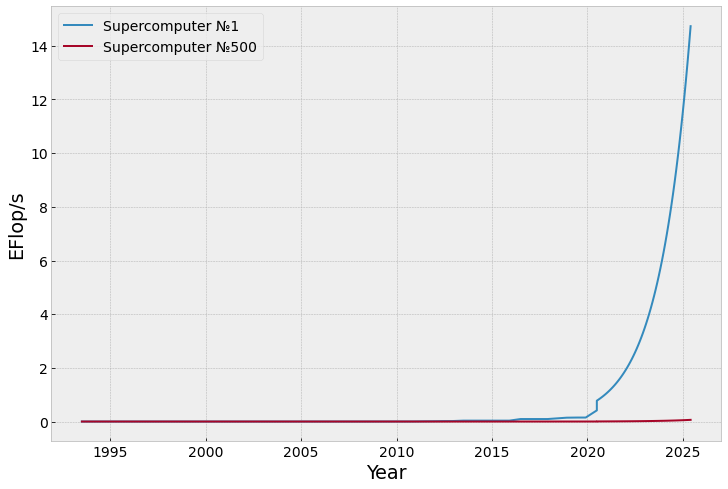

In [16]:
plt.figure(figsize=(12, 8))
plt.xlabel('Year')
plt.ylabel('EFlop/s')
plt.plot(years, y_EFlops_n1, label='Supercomputer №1')
plt.plot(years, y_EFlops_n500, label='Supercomputer №500')
plt.legend();

In [17]:
y_EFlops_n1[-1]

14.731581018978309

In [18]:
y_PFlops_n500[-1]

62.590543984786905

**14.73 эксафлопса** в 2025 году для номера 1 в топ 500.

**62.59 петафлопса** в 2025 году для номера 500.

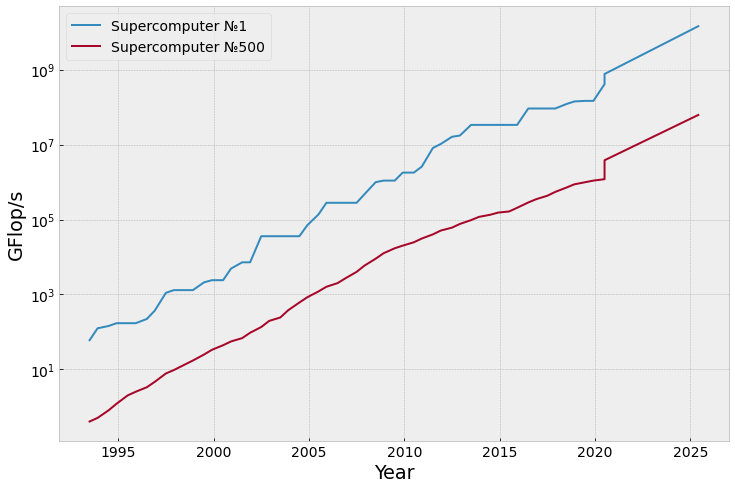

In [19]:
# тот же график, что и выше, но в log scale
plt.figure(figsize=(12, 8))
plt.xlabel('Year')
plt.ylabel('GFlop/s')
plt.plot(years, y_GFlops_n1, label='Supercomputer №1')
plt.plot(years, y_GFlops_n500, label='Supercomputer №500')
plt.legend()
plt.yscale('log')